# Project - Feature Scaling

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A sport magazine is writing an article on soccer players
- They have a special interest in left-footed players
- A question is whether they playing style can predict if a player is left-footed
- The questions they want to answer:
    - Can you from a features set on players predict if it is left-footed player
    - If so, what features matters the most

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
    - The data is from [Kaggle European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [27]:
data = pd.read_parquet('files/soccer.parquet')


In [28]:
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Apply `info()` to get an idea of the data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()``` and `.isnull().sum()`

In [30]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [31]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

### Step 2.c: Drop missing data
- A great idea is to investigate missing data and outliers
- But for this project we ignore it
- Apply `dropna()`

In [32]:
data = data.dropna()

In [33]:
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Step 2.d: Limite dataset size
- This project is only for demonstration
- Limit the dataset to the first 2000 rows
    - HINT: `iloc[:2000]`

In [34]:
data =data.iloc[:2000]

In [35]:
data

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,211185,306507,2015-02-20 00:00:00,64.0,69.0,right,high,medium,69.0,35.0,...,42.0,43.0,67.0,66.0,65.0,12.0,11.0,10.0,13.0,12.0
2040,211185,306507,2014-09-18 00:00:00,64.0,71.0,right,high,medium,69.0,35.0,...,42.0,43.0,67.0,66.0,65.0,12.0,11.0,10.0,13.0,12.0
2041,211185,306507,2014-04-25 00:00:00,63.0,73.0,right,high,medium,69.0,35.0,...,42.0,43.0,67.0,66.0,65.0,12.0,11.0,10.0,13.0,12.0


## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature Selection
- The classifier we want to predict is `preferred_foot` (independent feature/classification)
- For now we keep the other numeric features as depdent features
    - HINT: Use `.info()` to see numeric columns
    - HINT: Use `.drop([...], axis=1)`
- Assign the dependent features to `X` and the independent feature to `y`

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2043
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   2000 non-null   int64  
 1   player_api_id        2000 non-null   int64  
 2   date                 2000 non-null   object 
 3   overall_rating       2000 non-null   float64
 4   potential            2000 non-null   float64
 5   preferred_foot       2000 non-null   object 
 6   attacking_work_rate  2000 non-null   object 
 7   defensive_work_rate  2000 non-null   object 
 8   crossing             2000 non-null   float64
 9   finishing            2000 non-null   float64
 10  heading_accuracy     2000 non-null   float64
 11  short_passing        2000 non-null   float64
 12  volleys              2000 non-null   float64
 13  dribbling            2000 non-null   float64
 14  curve                2000 non-null   float64
 15  free_kick_accuracy   2000 non-null   f

In [37]:
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [62]:
X = data.drop(['date'], axis =1 )
X = X.drop(['attacking_work_rate'], axis =1 )
X = X.drop(['defensive_work_rate','preferred_foot'], axis =1 )






In [63]:
y = data['preferred_foot']

In [64]:
X.head()
#y = np.array([0 if value == 'No' else 1 for value in y])

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Step 3.b: Split into train and test
- Use `train_test_split` to divide into train and test data.
- A great thing is to use `random_state` to be able to reproduce while experimenting
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
pd.DataFrame(X_train).describe()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,178011.354667,166145.789333,67.196000,72.816667,56.125333,51.169333,57.197333,62.658000,49.690000,60.830667,...,57.886667,54.936667,47.296000,50.540667,47.851333,12.594667,13.92600,17.440667,14.027333,14.551333
std,43422.837605,154841.555342,7.108066,6.504813,16.234079,17.315134,13.894811,13.244596,16.742624,15.731931,...,14.634364,14.175752,19.651102,20.800371,20.537504,12.964815,12.09427,18.222143,12.302825,13.468245
min,2335.000000,12245.000000,42.000000,53.000000,6.000000,8.000000,10.000000,15.000000,5.000000,9.000000,...,15.000000,17.000000,5.000000,9.000000,11.000000,2.000000,1.00000,2.000000,2.000000,2.000000
25%,165740.000000,37422.000000,62.750000,68.000000,45.000000,38.000000,50.000000,58.000000,35.000000,53.000000,...,48.000000,45.000000,25.000000,29.000000,25.000000,7.000000,7.00000,7.000000,8.000000,8.000000
50%,188145.000000,128456.000000,68.000000,73.000000,59.000000,53.000000,59.000000,64.000000,53.000000,63.000000,...,59.000000,55.000000,52.000000,58.000000,53.000000,10.000000,11.00000,11.000000,11.000000,11.000000
75%,205162.000000,213695.000000,72.000000,77.250000,69.000000,66.000000,66.000000,71.000000,64.000000,71.000000,...,68.000000,66.000000,65.000000,69.000000,66.000000,13.000000,14.00000,14.000000,14.000000,14.000000
max,231638.000000,684978.000000,84.000000,90.000000,84.000000,80.000000,90.000000,85.000000,81.000000,94.000000,...,83.000000,86.000000,82.000000,83.000000,84.000000,77.000000,72.00000,84.000000,72.000000,80.000000


### Step 3.c: Normalize data
- Create a `MinMaxScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [67]:
norm= MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

### Step 3.c: Standardize data
- Create a `StandardScaler()`
- Fit it on the `X_train` dataset
- Then transform `X_train` and `X_test`
- Remember to assign the results to unique variables

In [68]:
scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

### Step 3.d: Compare sets
- For the Original, Normalized, and Standardized datasets
    - Create a `SVM` model and fit it
    - Predict values to calculate an accuracy score
- HINT: For each dataset be inspired by this
```Python
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)
```

In [70]:
score = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for train, test in zip(trainX, testX):
    svc = SVC()
    
    svc.fit(train, y_train)
    y_pred = svc.predict(test)

    score.append(accuracy_score(y_test, y_pred))

df_svr = pd.DataFrame({'Accuracy score': score}, index=['Original', 'Normalized', 'Standardized'])
df_svr

,Accuracy score
Original,0.768
Normalized,0.928
Standardized,0.954


### Step 3.e: Finding most important feature
- We now know that the features can predict if a player is left-footed
- Now we need to find the most important features
- [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) Permutation importance for feature evaluation.
- We will use the standardized data and fit a new `SVC` model
- Then use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test_stand, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [72]:
perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([ 0.0104,  0.0044,  0.0012,  0.0044,  0.0144,  0.0008,  0.0204,
        0.0044,  0.0548,  0.004 ,  0.0272,  0.004 ,  0.048 ,  0.0148,
        0.004 ,  0.0056,  0.0092,  0.0052,  0.0052,  0.0112,  0.0004,
        0.0068,  0.0556,  0.0036,  0.0192,  0.0112,  0.0204,  0.018 ,
        0.0032, -0.0048,  0.0084, -0.0068,  0.0008,  0.0032,  0.0156,
        0.0036,  0.0108])

### Step 3.f: Visualize the results
- To visualize the result we want the most important features sorted
- This can be `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- Then to visualize it we will create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

<AxesSubplot:>

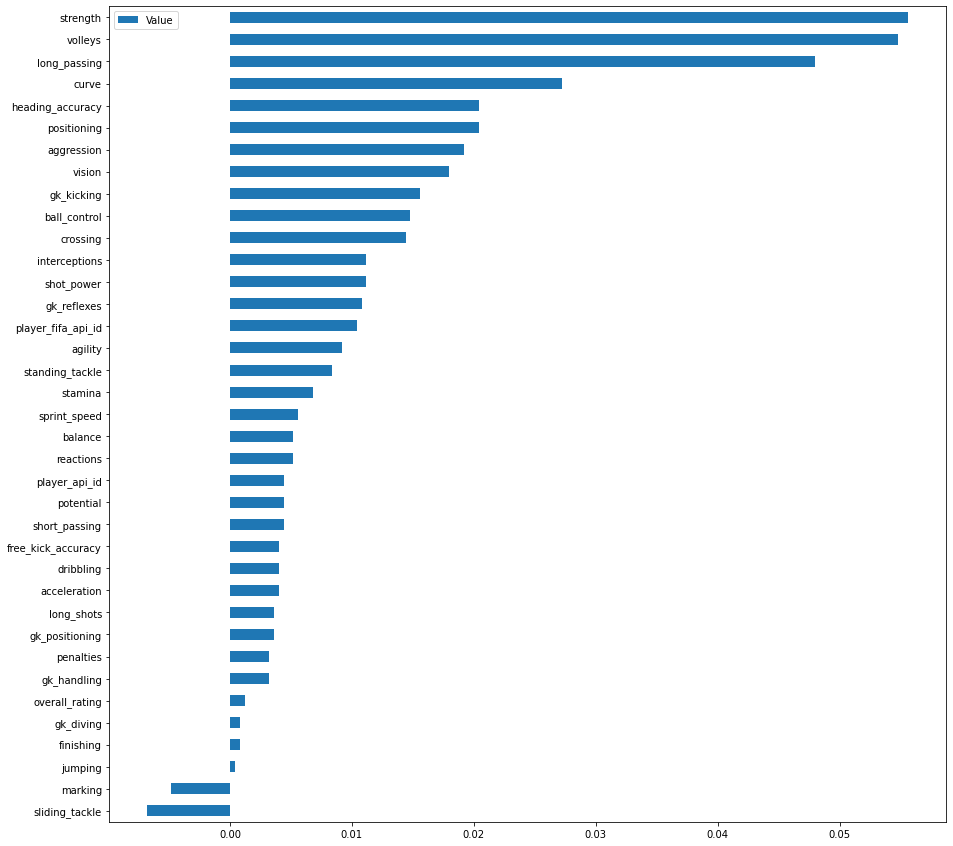

In [75]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh(figsize=(15,15))


## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present findings
- There are many ways to present the findings.
- Be creative
- Ideas
    - Explore how the features are related to the value

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Reflection
- There might not be any actions?